```
Topic:    Challenge Set 8
Subject:  Classification Errors
Date:     02/13/2017
Name:     Prashant Tatineni
```

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [14]:
df = df.replace('y',1)
df = df.replace('n',0)
for i in range(1,17):
    df[i] = df[i].replace('?',(df[i].replace('?',np.nan)).mean())

In [15]:
y = df[0]
X = df[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

**Challenge 1**

KNN

In [22]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_test_predicted = knn.predict(X_test)
accuracy_score(y_test, y_test_predicted)

0.93129770992366412

In [18]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y_test, y_test_predicted)

(array([ 0.925     ,  0.94117647]),
 array([ 0.96103896,  0.88888889]),
 array([ 0.94267516,  0.91428571]),
 array([77, 54]))

Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_test_predicted = lr.predict(X_test)
accuracy_score(y_test, y_test_predicted)

0.93893129770992367

In [27]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y_test, y_test_predicted)

(array([ 0.92592593,  0.96      ]),
 array([ 0.97402597,  0.88888889]),
 array([ 0.94936709,  0.92307692]),
 array([77, 54]))

Guess Democrat

In [28]:
y_test_predicted = ['democrat']*131
accuracy_score(y_test, y_test_predicted)

0.58778625954198471

In [30]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y_test, y_test_predicted)

(array([ 0.58778626,  0.        ]),
 array([ 1.,  0.]),
 array([ 0.74038462,  0.        ]),
 array([77, 54]))

Guess Republican

In [31]:
y_test_predicted = ['republican']*131
accuracy_score(y_test, y_test_predicted)

0.41221374045801529

In [32]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y_test, y_test_predicted)

(array([ 0.        ,  0.41221374]),
 array([ 0.,  1.]),
 array([ 0.        ,  0.58378378]),
 array([77, 54]))

Gaussian Naive Bayes

In [35]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_test_predicted = nb.predict(X_test)
accuracy_score(y_test, y_test_predicted)

0.93893129770992367

In [36]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y_test, y_test_predicted)

(array([ 0.91566265,  0.97916667]),
 array([ 0.98701299,  0.87037037]),
 array([ 0.95      ,  0.92156863]),
 array([77, 54]))

Support Vector Machine

In [37]:
svm = SVC()
svm.fit(X_train, y_train)
y_score_svm = svm.fit(X_train, y_train).decision_function(X_test)
y_test_predicted = svm.predict(X_test)
accuracy_score(y_test, y_test_predicted)

0.95419847328244278

In [38]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y_test, y_test_predicted)

(array([ 0.94936709,  0.96153846]),
 array([ 0.97402597,  0.92592593]),
 array([ 0.96153846,  0.94339623]),
 array([77, 54]))

Decision Tree

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_test_predicted = dt.predict(X_test)
accuracy_score(y_test, y_test_predicted)

0.94656488549618323

In [41]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y_test, y_test_predicted)

(array([ 0.94871795,  0.94339623]),
 array([ 0.96103896,  0.92592593]),
 array([ 0.95483871,  0.93457944]),
 array([77, 54]))

Random Forest

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_predicted = rf.predict(X_test)
accuracy_score(y_test, y_test_predicted)

0.95419847328244278

In [47]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y_test, y_test_predicted)

(array([ 0.94936709,  0.96153846]),
 array([ 0.97402597,  0.92592593]),
 array([ 0.96153846,  0.94339623]),
 array([77, 54]))

**Challenge 2**  
ROC curves are plotted using `.decision_function(X_test)`, where available, for the above classifiers.

In [87]:
fpr_lr, tpr_lr, _ = roc_curve(y_test,y_score_lr, pos_label='republican')
auc_lr = auc(fpr_lr,tpr_lr)

In [88]:
fpr_svm, tpr_svm, _ = roc_curve(y_test,y_score_svm, pos_label='republican')
auc_svm = auc(fpr_svm,tpr_svm)

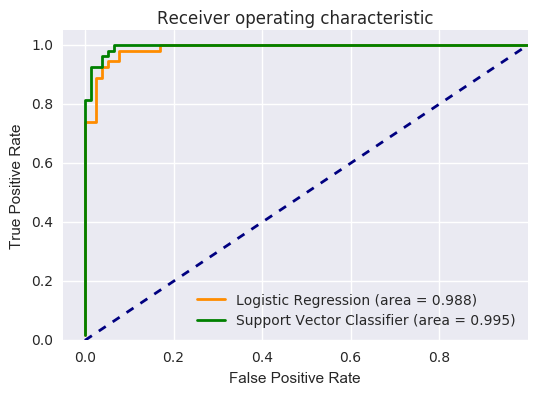

In [91]:
plt.plot(fpr_lr, tpr_lr, color='darkorange',
         lw=2, label='Logistic Regression (area = %0.3f)' % auc_lr)
plt.plot(fpr_svm, tpr_svm, color='green',
         lw=2, label='Support Vector Classifier (area = %0.3f)' % auc_svm)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.title('Receiver operating characteristic')
plt.legend(loc=4)

**Challenge 3**

KNN

In [117]:
y_predicted = cross_val_predict(KNeighborsClassifier(n_neighbors=6), X, y, cv=10)
accuracy_score(y, y_predicted)

0.93563218390804592

In [118]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y, y_predicted)

(array([ 0.95437262,  0.90697674]),
 array([ 0.94007491,  0.92857143]),
 array([ 0.94716981,  0.91764706]),
 array([267, 168]))

Logistic Regression

In [119]:
y_predicted = cross_val_predict(LogisticRegression(), X, y, cv=10)
accuracy_score(y, y_predicted)

0.95862068965517244

In [120]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y, y_predicted)

(array([ 0.96629213,  0.94642857]),
 array([ 0.96629213,  0.94642857]),
 array([ 0.96629213,  0.94642857]),
 array([267, 168]))

Gaussian NB

In [121]:
y_predicted = cross_val_predict(GaussianNB(), X, y, cv=10)
accuracy_score(y, y_predicted)

0.94022988505747129

In [122]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y, y_predicted)

(array([ 0.95131086,  0.92261905]),
 array([ 0.95131086,  0.92261905]),
 array([ 0.95131086,  0.92261905]),
 array([267, 168]))

Support Vector

In [123]:
y_predicted = cross_val_predict(SVC(), X, y, cv=10)
accuracy_score(y, y_predicted)

0.95862068965517244

In [124]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y, y_predicted)

(array([ 0.97701149,  0.93103448]),
 array([ 0.95505618,  0.96428571]),
 array([ 0.96590909,  0.94736842]),
 array([267, 168]))

Decision Tree

In [133]:
y_predicted = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
accuracy_score(y, y_predicted)

0.94022988505747129

In [134]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y, y_predicted)

(array([ 0.9581749,  0.9127907]),
 array([ 0.94382022,  0.93452381]),
 array([ 0.9509434 ,  0.92352941]),
 array([267, 168]))

Random Forest

In [136]:
y_predicted = cross_val_predict(RandomForestClassifier(), X, y, cv=10)
accuracy_score(y, y_predicted)

0.9517241379310345

In [137]:
# Precision, Recall, F1, Support ['democrat','republican']
precision_recall_fscore_support(y, y_predicted)

(array([ 0.96590909,  0.92982456]),
 array([ 0.95505618,  0.94642857]),
 array([ 0.96045198,  0.9380531 ]),
 array([267, 168]))

**Challenge 4**

In [145]:
mv = pd.read_csv('2013_movies.csv')
model_mv = mv[['Rating','Budget','DomesticTotalGross','Runtime']].dropna()
y = model_mv['Rating']
X = model_mv[['Budget','DomesticTotalGross','Runtime']]
(model_mv.groupby('Rating')['Budget'].count())

Rating
PG       15
PG-13    41
R        33
Name: Budget, dtype: int64

KNN

In [146]:
y_predicted = cross_val_predict(KNeighborsClassifier(n_neighbors=5), X, y, cv=10)
# Precision, Recall, F1, Support ['PG','PG-13','R']
precision_recall_fscore_support(y, y_predicted)

(array([ 0.11111111,  0.5       ,  0.5       ]),
 array([ 0.06666667,  0.6097561 ,  0.45454545]),
 array([ 0.08333333,  0.54945055,  0.47619048]),
 array([15, 41, 33]))

Logistic Regression

In [147]:
y_predicted = cross_val_predict(LogisticRegression(), X, y, cv=10)
# Precision, Recall, F1, Support ['PG','PG-13','R']
precision_recall_fscore_support(y, y_predicted)

(array([ 0.        ,  0.48571429,  0.52631579]),
 array([ 0.        ,  0.82926829,  0.3030303 ]),
 array([ 0.        ,  0.61261261,  0.38461538]),
 array([15, 41, 33]))

**Challenge 5**

In [158]:
hab = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)
hab.columns = ['age','yr','nodes','survived5']
y = hab['survived5']
X = hab[['age','yr','nodes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [159]:
lr = LogisticRegression()
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr, pos_label=2)
auc_lr = auc(fpr_lr,tpr_lr)

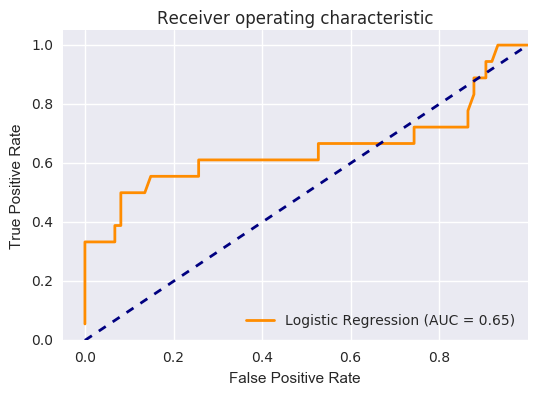

In [160]:
plt.plot(fpr_lr, tpr_lr, color='darkorange',
         lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.title('Receiver operating characteristic')
plt.legend(loc=4)